In [2]:
library(tidyverse)


zm_CNS_distances <- read_delim("/scratch/jpm73279/comparative_single_cell/17.analyze_cell_type_ACRs/zm_CNS.closest_ACR.bed",
                               delim = "\t", col_names = c("chrom", "start","start","start","start","start","start","start","start"))  %>% 
    mutate(species = "Zm")  %>% 
    select(species, X10)

sb_CNS_distances <- read_delim("/scratch/jpm73279/comparative_single_cell/17.analyze_cell_type_ACRs/sb_CNS.closest_ACR.bed",
                              delim = "\t", col_names = c("chrom", "start","start","start","start","start","start","start"))  %>% 
    mutate(species = "Sb") %>% 
    select(species, X10)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.1”
Warning message:
“package ‘tibble’ was built under R version 4.2.1”
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2.9000 ──
✔ dplyr     1.0.10         ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.0     
✔ ggplot2   3.3.6          ✔ tibble    3.1.8     
✔ lubridate 1.9.2          ✔ tidyr     1.2.1     
✔ purrr     0.3.5          
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `start` -> `start...2`
• `start` -> `start...3`
• `start` -> `start...4`
• `start` -> `start...5`
• `start` -> `start...6`
• `start` -> `st

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 175 rows containing non-finite values (stat_bin).”


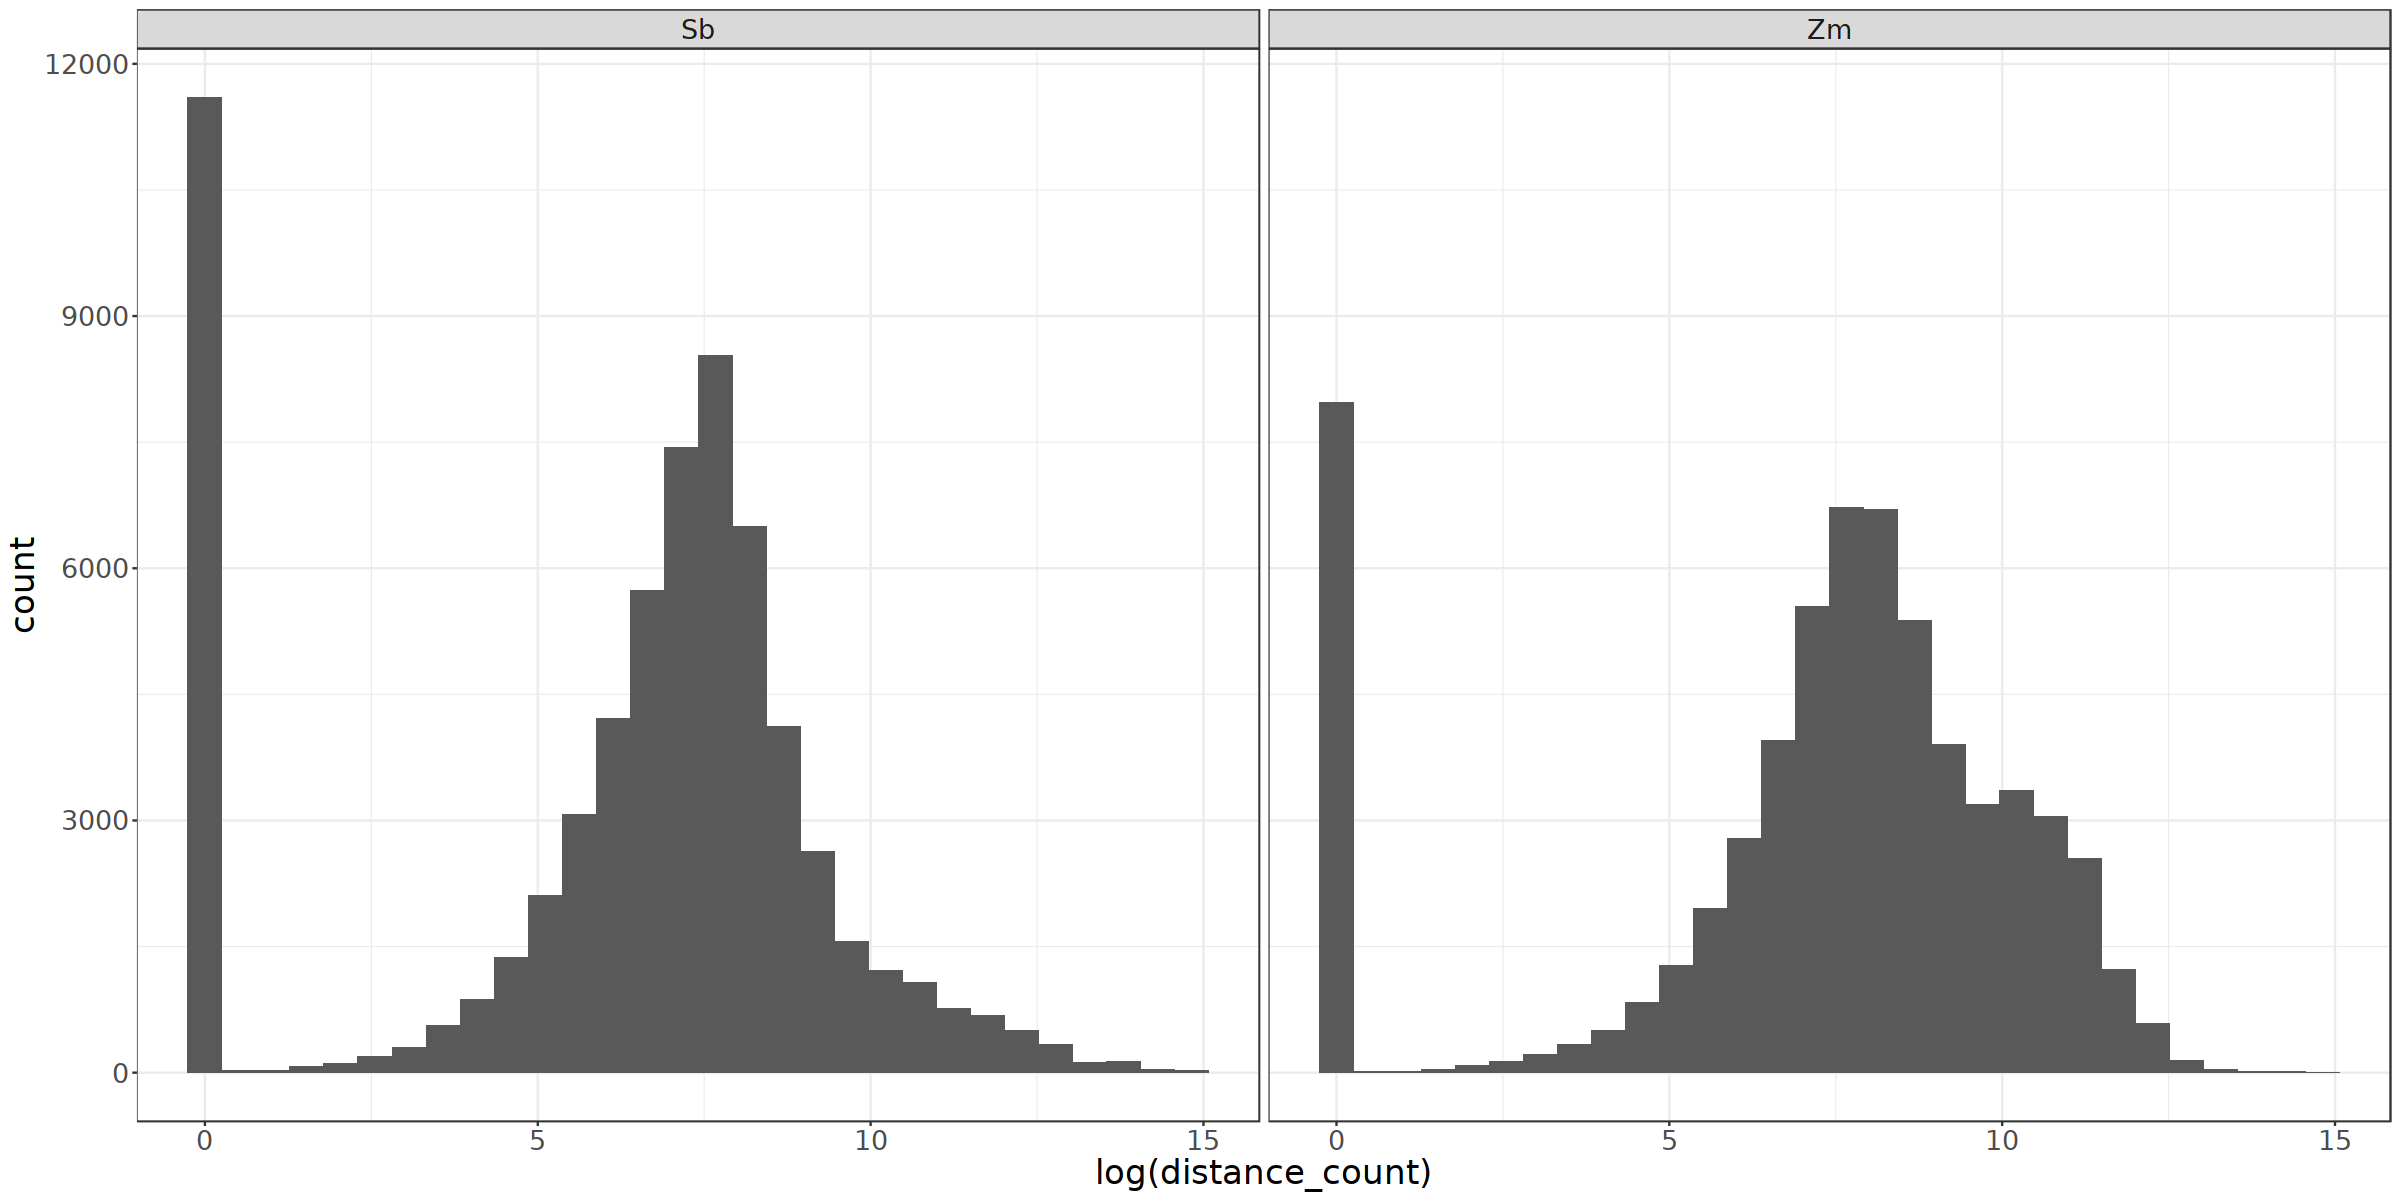

In [3]:

options(repr.plot.width=20, repr.plot.height=10)
combined <- bind_rows(sb_CNS_distances, zm_CNS_distances)  %>% 
    replace(is.na(.), 0)  %>% 
    mutate(distance_count = X10 +1)

ggplot(combined, aes(x = log(distance_count))) + geom_histogram() + facet_grid(.~species) + theme_bw() +
    theme(text = element_text(size = 20))

 
 


Warning message:
“Removed 341 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 27 rows containing missing values (geom_bar).”
Warning message:
“Removed 3739 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 27 rows containing missing values (geom_bar).”


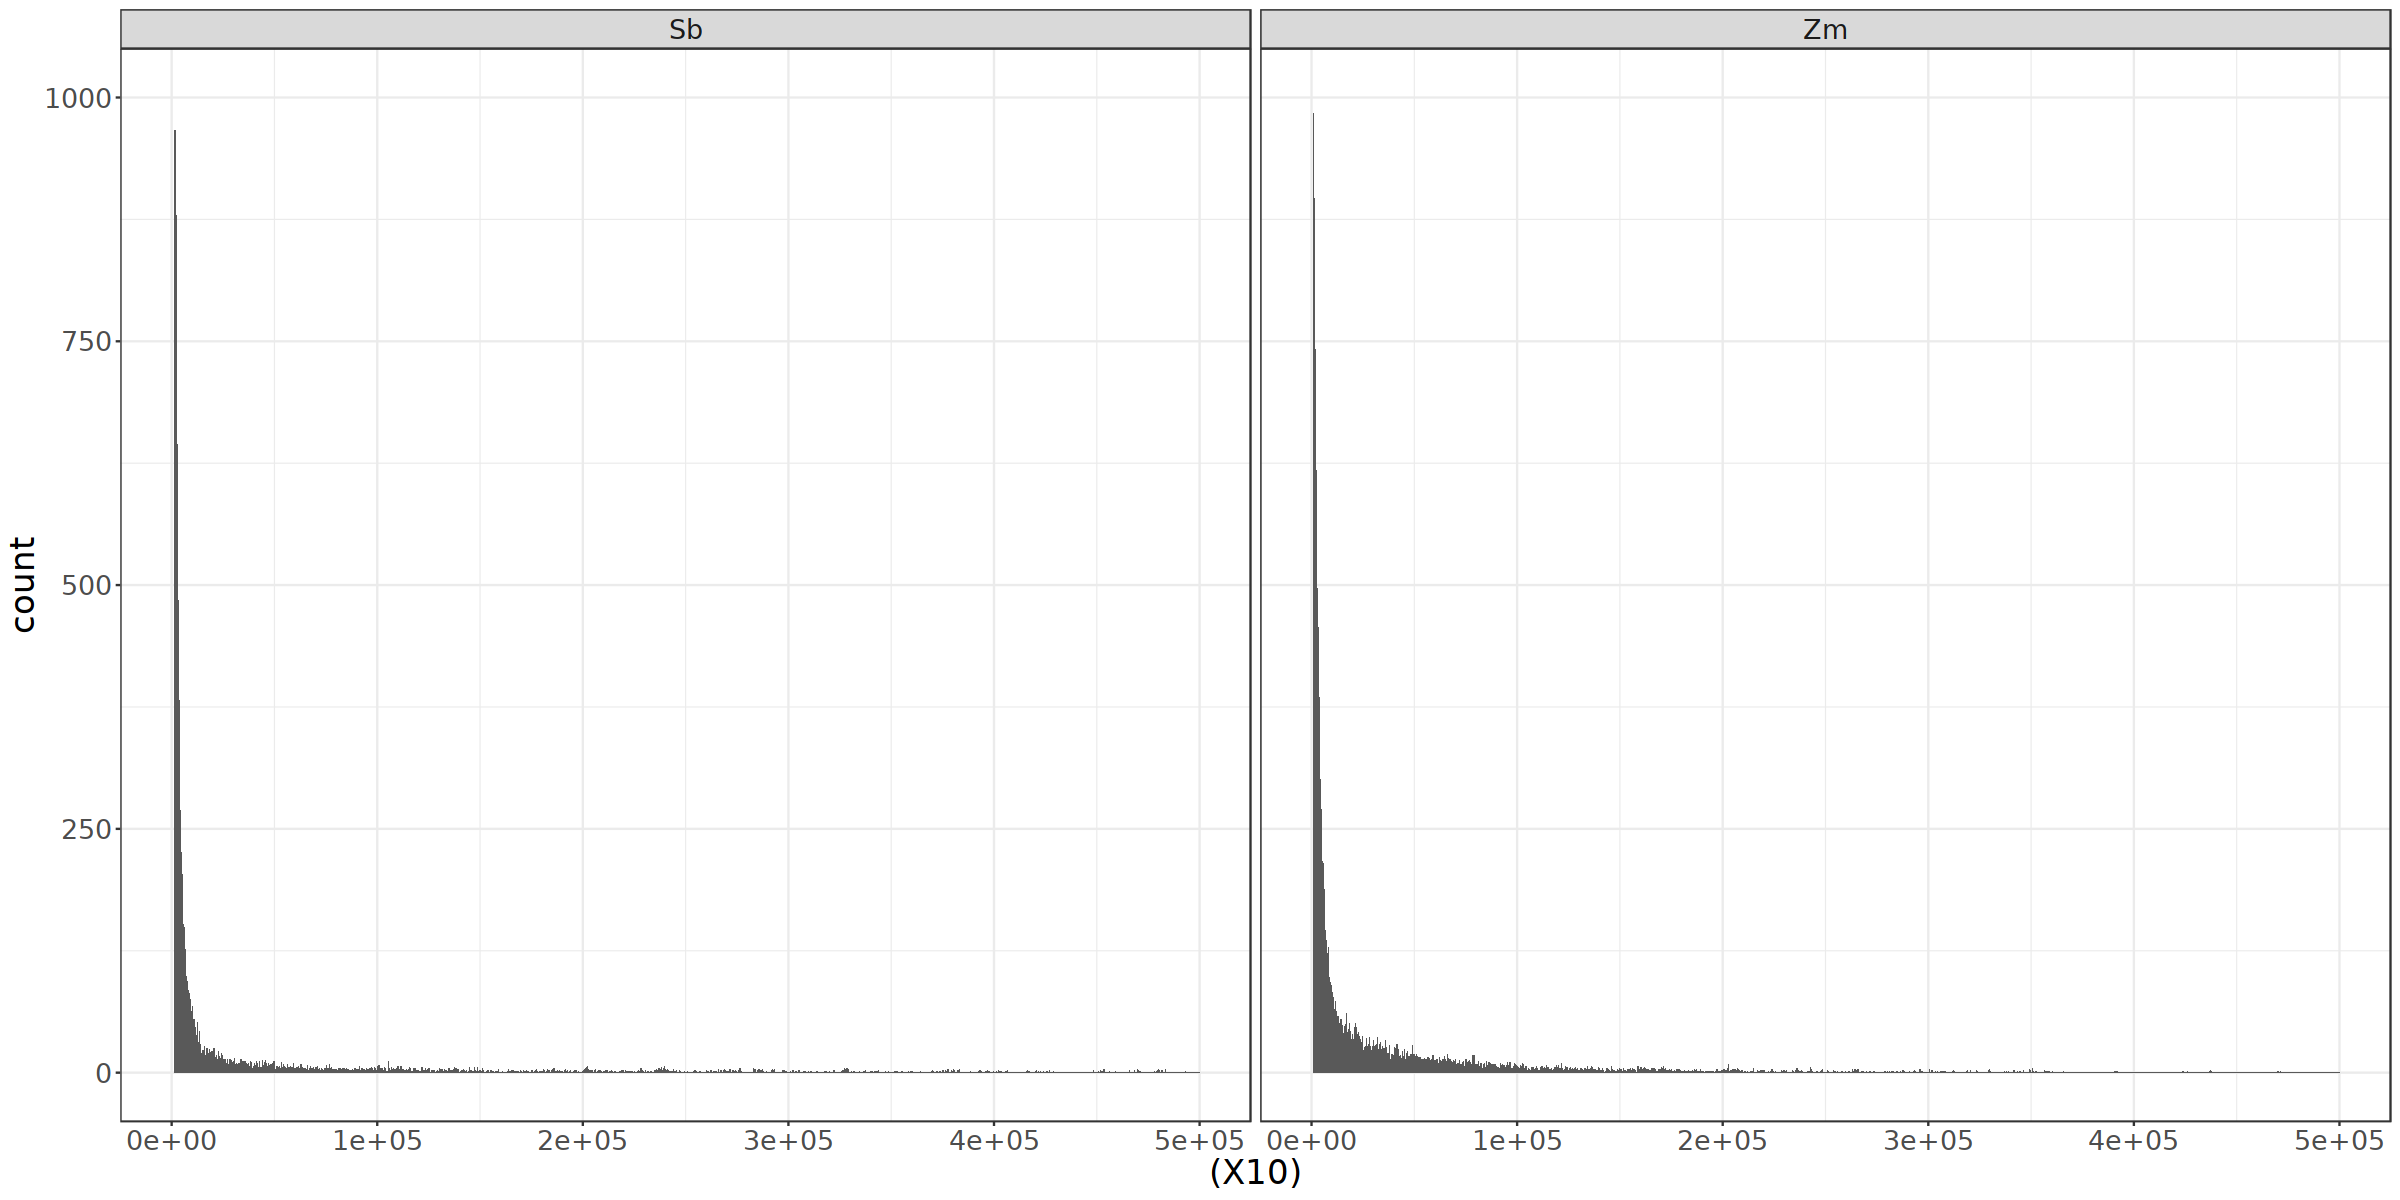

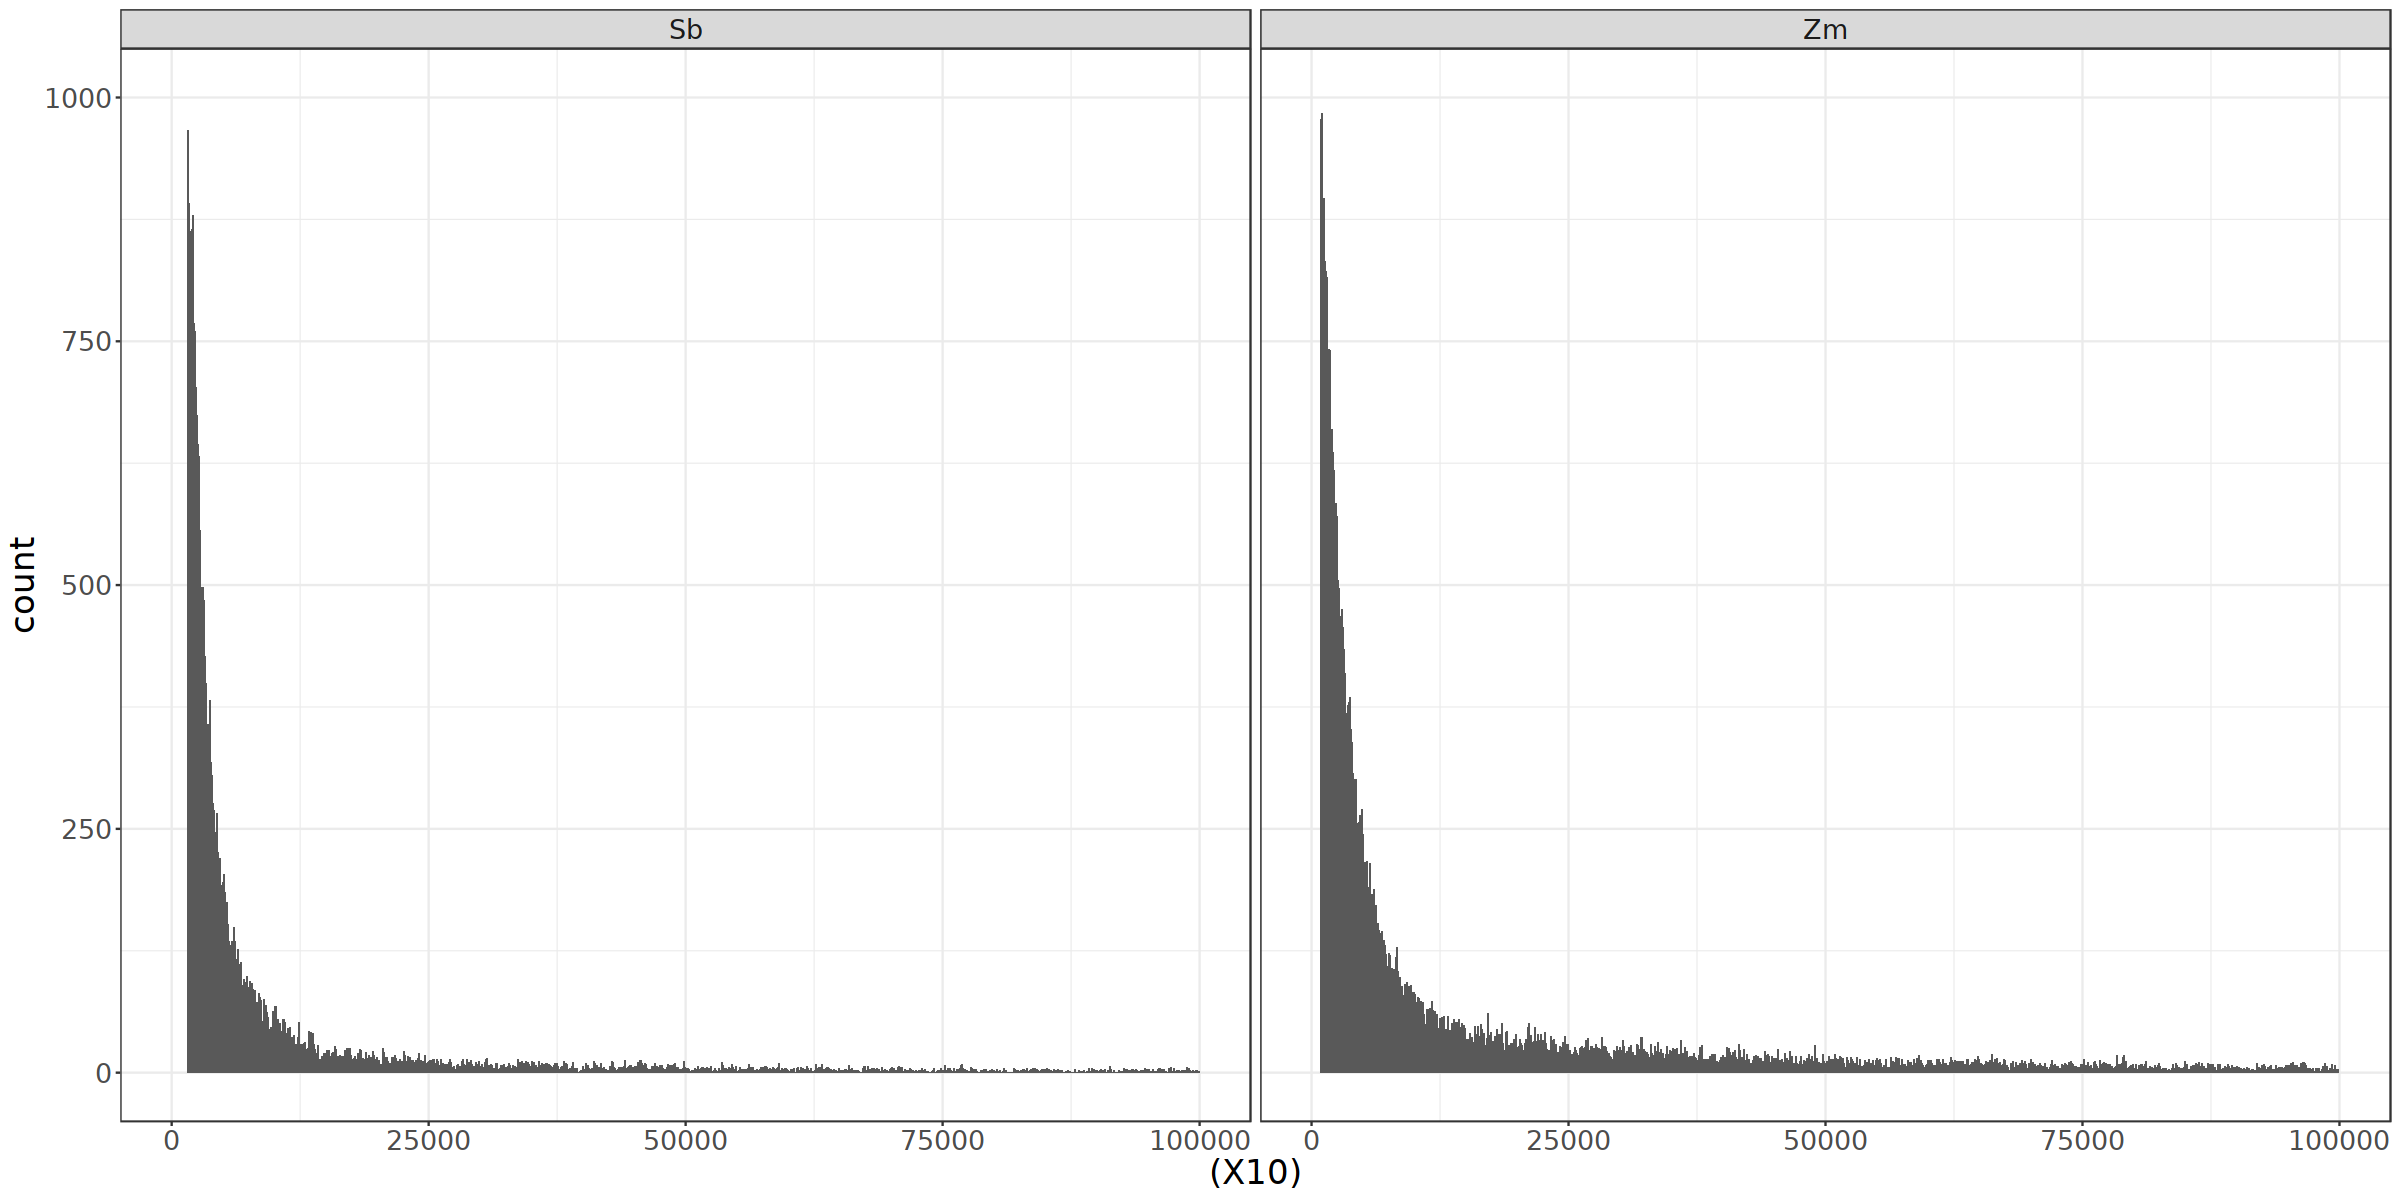

In [4]:
options(repr.plot.width=20, repr.plot.height=10)
combined <- bind_rows(sb_CNS_distances, zm_CNS_distances)  %>% 
    replace(is.na(.), 0) 



ggplot(combined, aes(x = (X10))) + geom_histogram(binwidth = 100) + facet_grid(.~species) + 
    xlim(-2, 500000) + ylim(0,1000) + theme_bw() +
    theme(text = element_text(size = 20))


 
ggplot(combined, aes(x = (X10))) + geom_histogram(binwidth = 100) + facet_grid(.~species) + 
    xlim(-2, 100000) + ylim(0,1000) + theme_bw() +
    theme(text = element_text(size = 20))




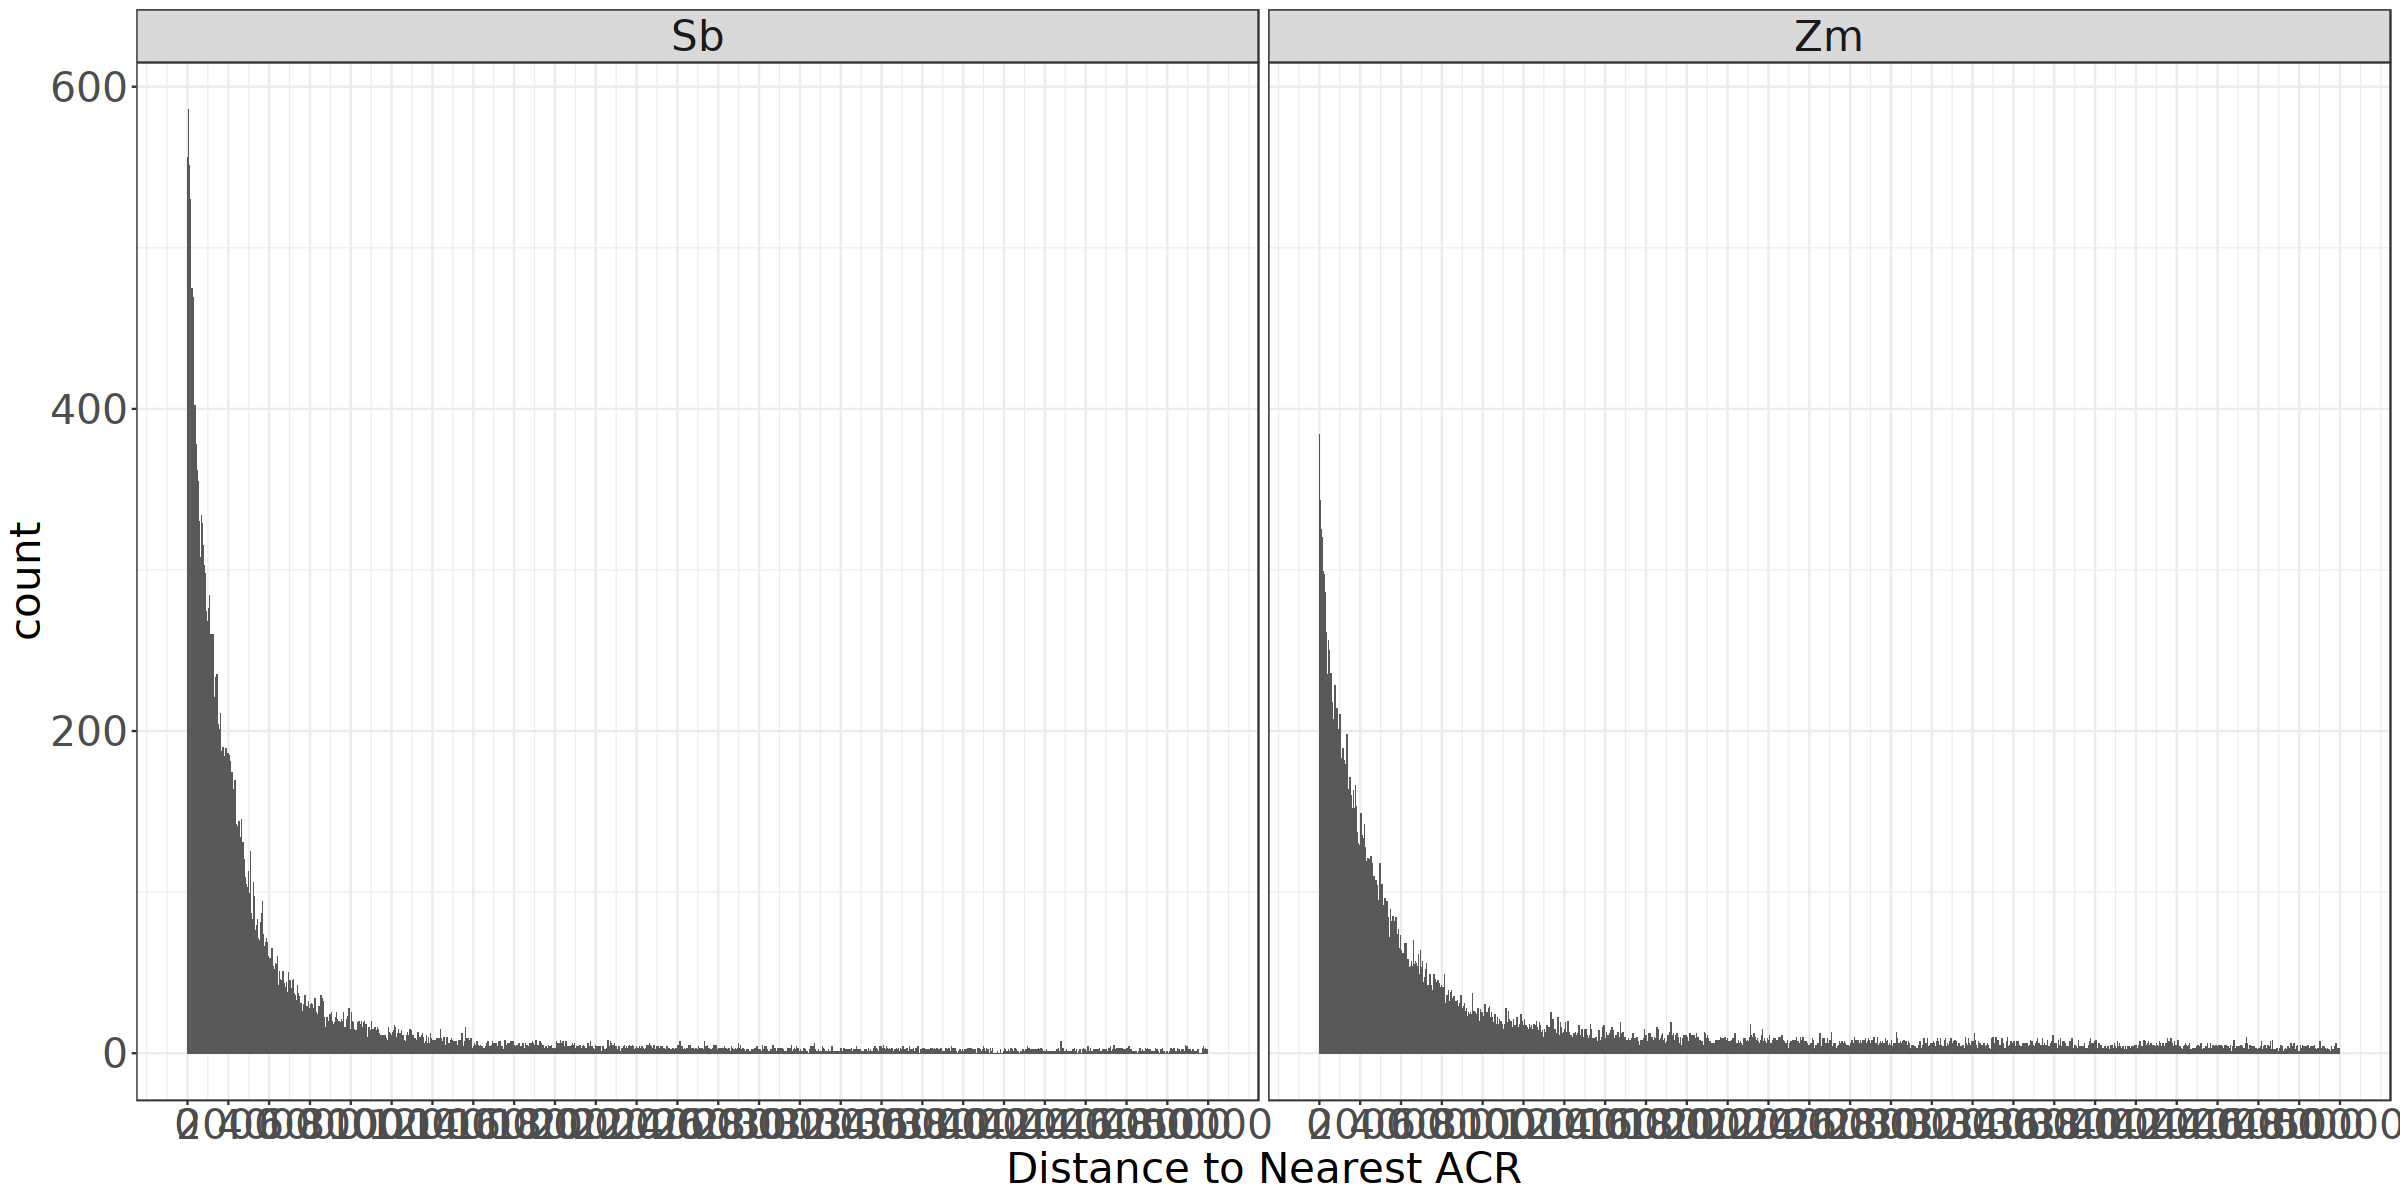

In [5]:
combined  %>% 
    dplyr::filter(X10 < 50000)  %>% 
    dplyr::filter(X10 != 0)  %>% 
    ggplot(., aes(x = (X10))) + geom_histogram(binwidth = 20) + facet_grid(.~species) + 
    theme(text = element_text(size = 30)) + theme_bw() +
    xlab("Distance to Nearest ACR") + 
    scale_x_continuous(breaks = seq(0, 50000, 2000)) +
theme(
    text = element_text(size = 30), # set base size to 30
    axis.title = element_text(size = 25), # set axis title size to 30
    strip.text = element_text(size = 25) # set facet label size to 30
  )




In [ ]:
combined  %>% 
    dplyr::filter(X10 < 50000)  %>% 